<font size="6">Dataset contains earthquakes occuring in Egypt's RedSea, from 1955 to 2024</font>

In [2]:
import pandas as pd

In [3]:
#Importing dataset and taking a quick look:
df = pd.read_csv(r"C:\Users\NohaKhaled\Desktop\DataAnalysis\Projects\Egypt RedSea Earthquake\archive\Egypt-RedSea Earthquake Dataset (1955-2024) V2.csv")
df.head(10)

,time,latitude,longitude,depth,mag_Mw,rms,days_since_last_event,events_last_30_days,events_last_90_days,avg_mag_last_30_days,avg_mag_last_90_days,max_mag_last_30_days,max_mag_last_90_days,distance_from_cairo_km,mag_category_3classes
0,1955-11-12 05:32:18.020000+00:00,25.119,34.506,15.0,5.730,0.89,0,1,1,5.730000,5.730000,5.73,5.73,635.386813,2
1,1956-12-18 17:53:06.180000+00:00,31.522,35.487,15.0,5.670,0.89,402,2,2,5.700000,5.700000,5.73,5.73,438.053224,2
2,1969-03-31 07:15:52.940000+00:00,27.575,33.895,10.0,6.600,0.89,4485,3,3,6.000000,6.000000,6.60,6.60,377.501197,2
3,1969-04-14 13:43:56.580000+00:00,27.343,33.665,15.0,5.190,0.89,14,4,4,5.797500,5.797500,6.60,6.60,382.563572,2
4,1972-06-28 09:49:36.850000+00:00,27.643,33.815,15.0,5.600,0.89,1170,5,5,5.758000,5.758000,6.60,6.60,366.598949,2
5,1973-03-05 23:59:46.600000+00:00,27.686,33.644,25.0,4.855,0.89,250,6,6,5.548333,5.548333,6.60,6.60,351.786522,1
6,1974-04-29 20:04:39.700000+00:00,30.529,31.721,33.0,5.195,0.89,419,7,7,5.455714,5.455714,6.60,6.60,71.238408,2
7,1978-12-09 07:12:52.400000+00:00,23.951,26.353,10.0,5.535,0.89,1684,8,8,5.436250,5.436250,6.60,6.60,832.278883,2
8,1979-04-23 13:01:58.600000+00:00,31.244,35.461,33.0,5.365,0.89,135,9,9,5.398889,5.398889,6.60,6.60,425.622620,2
9,1981-11-14 09:05:29.010000+00:00,23.686,32.604,10.0,5.621,1.20,935,10,10,5.389000,5.389000,6.60,6.60,719.908341,2


<font size="5">Goal of this project</font>

<font size="4"> 1. Identify the years with the most earthquake activity </font>

<font size ="4">2. Look at the earthquake activity (quantity and strength) over the whole period 1955 to 2024 </font>

<font size ="4">3. Identify the relationship (if any) between the earthquake strength and focal depth</font>


------------
<font size="5">1. Data Exploration</font>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    473 non-null    object 
 1   latitude                473 non-null    float64
 2   longitude               473 non-null    float64
 3   depth                   473 non-null    float64
 4   mag_Mw                  473 non-null    float64
 5   rms                     473 non-null    float64
 6   days_since_last_event   473 non-null    int64  
 7   events_last_30_days     473 non-null    int64  
 8   events_last_90_days     473 non-null    int64  
 9   avg_mag_last_30_days    473 non-null    float64
 10  avg_mag_last_90_days    473 non-null    float64
 11  max_mag_last_30_days    473 non-null    float64
 12  max_mag_last_90_days    473 non-null    float64
 13  distance_from_cairo_km  473 non-null    float64
 14  mag_category_3classes   473 non-null    in

In [5]:
df.describe()

,latitude,longitude,depth,mag_Mw,rms,days_since_last_event,events_last_30_days,events_last_90_days,avg_mag_last_30_days,avg_mag_last_90_days,max_mag_last_30_days,max_mag_last_90_days,distance_from_cairo_km,mag_category_3classes
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,28.820937,34.105139,11.138372,4.059459,0.848161,52.845666,29.080338,81.532770,3.965345,3.997000,5.306681,6.069894,349.710227,0.896406
std,1.240037,1.515133,4.663102,0.878397,0.355706,242.301656,4.156613,20.843126,0.614166,0.535282,0.843769,0.772042,117.481248,0.647557
min,23.006800,24.552500,1.000000,1.851000,0.000000,0.000000,1.000000,1.000000,2.550000,2.878889,3.600000,4.600000,6.268988,0.000000
25%,28.469000,34.006000,10.000000,3.550000,0.600000,0.000000,30.000000,90.000000,3.733333,3.834444,4.700000,5.500000,345.947938,0.000000
50%,28.807000,34.657000,10.000000,4.140000,0.890000,3.000000,30.000000,90.000000,4.050000,4.045556,5.300000,6.100000,367.056732,1.000000
75%,29.205000,34.855000,10.000000,4.770000,1.100000,35.000000,30.000000,90.000000,4.296667,4.191111,5.800000,6.600000,388.345330,1.000000
max,31.997000,35.936000,35.000000,7.200000,1.700000,4485.000000,30.000000,90.000000,6.000000,6.000000,7.200000,7.200000,832.278883,2.000000


In [6]:
df.isnull()

,time,latitude,longitude,depth,mag_Mw,rms,days_since_last_event,events_last_30_days,events_last_90_days,avg_mag_last_30_days,avg_mag_last_90_days,max_mag_last_30_days,max_mag_last_90_days,distance_from_cairo_km,mag_category_3classes
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
469,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
470,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
471,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

time                      0
latitude                  0
longitude                 0
depth                     0
mag_Mw                    0
rms                       0
days_since_last_event     0
events_last_30_days       0
events_last_90_days       0
avg_mag_last_30_days      0
avg_mag_last_90_days      0
max_mag_last_30_days      0
max_mag_last_90_days      0
distance_from_cairo_km    0
mag_category_3classes     0
dtype: int64

In [8]:
df.isnull().values.any()

np.False_

<font size="4">
Dataset contains no null values.
</font>

Cleaning to be done:

    1. Extract a column for years for the time column
    2. To consider: Rounding the decimal numbers to two digits after the dot -- would be simpler and clearer for the plots later on

Some definitions for the columns:

    -- mag_Mw is magnitude in 'Moment Magnitude'. The bigger, the more physical energy released during the earth quake.

        Scale:
        2 Mw - micro,
        5 Mw - moderate,
        7 Mw - major,
        9+ Mw - great

    -- mag_category_3classes: 
        minor - moderate - major

    -- rms - Root mean square residuals (location quality)

        lower values - more matching between the predicted earthquake location and the actual location

        higher values - less matching between the predicted earthquake location and the actual location

----

<font size="4">
2. Data Cleaning
</font>

    1. Extract a column for years for the time column
    2. Rounding the decimal numbers to two digits after the dot


In [9]:
df['time'].head(88)

0     1955-11-12 05:32:18.020000+00:00
1     1956-12-18 17:53:06.180000+00:00
2     1969-03-31 07:15:52.940000+00:00
3     1969-04-14 13:43:56.580000+00:00
4     1972-06-28 09:49:36.850000+00:00
                    ...               
83    1992-11-04 16:29:39.930000+00:00
84    1992-11-05 18:41:49.770000+00:00
85    1992-11-05 19:16:46.370000+00:00
86           1992-11-06 02:42:01+00:00
87    1992-11-07 01:35:03.670000+00:00
Name: time, Length: 88, dtype: object

In [10]:
#Current format:
# yyyy-mm-dd hours:min:seconds

In [11]:
df[['year', 'delete_later']] = df['time'].str.split("-", n = 1, expand = True)
df.drop(columns = 'delete_later', inplace = True)

In [12]:
#Rerun this line everytime you open this notebook:
df['avg_mag_last_30_days'] = df['avg_mag_last_30_days'].round(2)
df['avg_mag_last_90_days'] = df['avg_mag_last_90_days'].round(2)
df['distance_from_cairo_km'] = df['distance_from_cairo_km'].round(2)

In [13]:
df.head(5)

,time,latitude,longitude,depth,mag_Mw,rms,days_since_last_event,events_last_30_days,events_last_90_days,avg_mag_last_30_days,avg_mag_last_90_days,max_mag_last_30_days,max_mag_last_90_days,distance_from_cairo_km,mag_category_3classes,year
0,1955-11-12 05:32:18.020000+00:00,25.119,34.506,15.0,5.73,0.89,0,1,1,5.73,5.73,5.73,5.73,635.39,2,1955
1,1956-12-18 17:53:06.180000+00:00,31.522,35.487,15.0,5.67,0.89,402,2,2,5.70,5.70,5.73,5.73,438.05,2,1956
2,1969-03-31 07:15:52.940000+00:00,27.575,33.895,10.0,6.60,0.89,4485,3,3,6.00,6.00,6.60,6.60,377.50,2,1969
3,1969-04-14 13:43:56.580000+00:00,27.343,33.665,15.0,5.19,0.89,14,4,4,5.80,5.80,6.60,6.60,382.56,2,1969
4,1972-06-28 09:49:36.850000+00:00,27.643,33.815,15.0,5.60,0.89,1170,5,5,5.76,5.76,6.60,6.60,366.60,2,1972


----------------

<font size="4">
3. Extracting years and locations from Coordinates for the highest 15 earthquakes:
</font>

In [14]:
#Extracting the strongest 15 earthquakes:

top_15_earthquakes = df.nlargest(15, 'mag_Mw')[['latitude', 'longitude', 'depth', 'mag_Mw', 'rms', 'days_since_last_event', 'events_last_30_days', 'events_last_90_days', 'avg_mag_last_30_days',
                                                'avg_mag_last_90_days', 'max_mag_last_30_days', 'max_mag_last_90_days' ,'distance_from_cairo_km', 'mag_category_3classes' ,'year']]
top_15_earthquakes = top_15_earthquakes.sort_values(by = 'year')

In [15]:
#Getting the location names of the coordinates to be displayed on a map - an abandoned idea:

# %pip install geopy
# from geopy.geocoders import Nominatim
# import time

# location_names = []

# geolocator = Nominatim(user_agent = 'egypt_earthquakes')

# for index, row in top_15_earthquakes.iterrows():
#     lat = row['latitude']
#     long = row['longitude']
#     location = geolocator.reverse(f"{lat}, {long}", language = 'en')

#     if location:
#         location_names.append(location.address)
#     else:
#         location_names.append("Location not found")

#     time.sleep(1)


# top_15_earthquakes['location'] = location_names
# top_15_earthquakes = top_15_earthquakes.sort_values(by = 'year').reset_index().drop(columns = 'index')

In [16]:
#Getting the years with more than 10 earthquakes:

df['year'] = df['year'].astype(int)
quakes_per_year_10 = df['year'].value_counts().reset_index().query('count >= 10')

year = quakes_per_year_10['year']
count = quakes_per_year_10['count']

In [17]:
#Highest earthquake magnitude each year:

temp_df_1 = df.groupby('year')['mag_Mw'].max().reset_index()[['year', 'mag_Mw']].sort_values(by = 'year')
year_highest_mag_1 = temp_df_1['year']
highest_mag = temp_df_1['mag_Mw']

In [18]:
#Deepest earthquake each year:

temp_df_2 = df.groupby('year')['depth'].max().reset_index()[['year', 'depth']].sort_values(by = 'year')
year_highest_mag_2 = temp_df_2['year']
deepest = temp_df_2['depth'] * -1

In [19]:
#Number of Earthquakes per year in brackets:

quakes_per_year = df['year'].reset_index().drop(columns = 'index')

def myfunc(row):
     x = row['year']
     if ((x >= 1955) and (x < 1960)):
         return '1955 to 1960'
     elif ((x >= 1960) and (x < 1970)):
         return '1960 to 1970'
     elif ((x >= 1970) and (x < 1980)):
         return '1970 to 1980'
     elif ((x >= 1980) and (x < 1990)):
         return '1980 to 1990'
     elif ((x >= 1990) and (x < 2005)):
         return '1990 to 2000'
     elif ((x >= 2005) and (x < 2010)):
         return '2005 to 2010'
     elif ((x >= 2010) and (x < 2020)):
         return '2010 to 2020'
     elif ((x >= 2020) and (x < 2025)):
         return '2020 to 2024'
    
quakes_per_year['year_bracket'] = df.apply(myfunc, axis = 1)

quakes_per_year = quakes_per_year['year_bracket'].value_counts().reset_index()

quakes_per_year = quakes_per_year.sort_values(by = 'year_bracket')

year_bracket = quakes_per_year['year_bracket']
year_count = quakes_per_year['count']

------------

<font size="4"> Visualizing Findings </font>

In [20]:
from matplotlib import pyplot as plt
import numpy as np
plt.style.use( 'seaborn-v0_8-whitegrid')

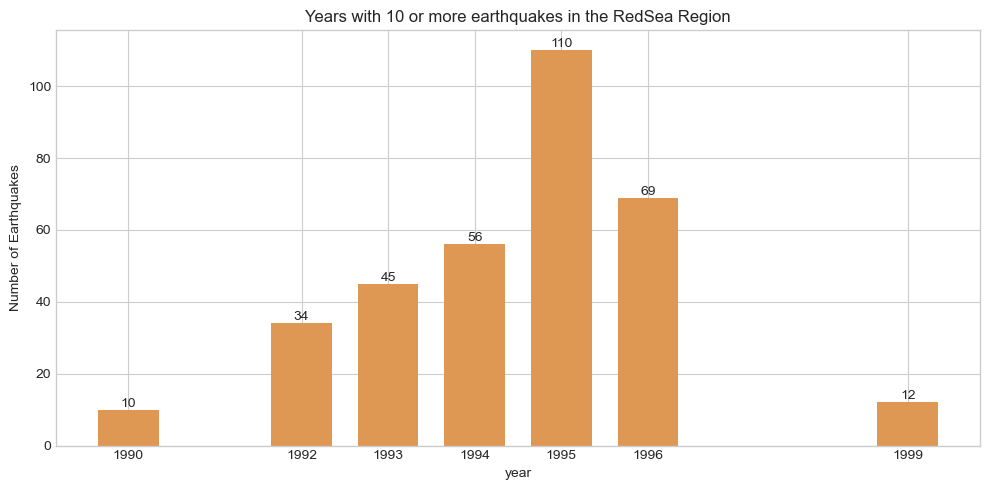

In [21]:
#Plot: Years with 10 or more earthquakes in the RedSea Region

plt.figure(figsize = (10,5))

plt.bar_label(plt.bar(year, count, width = 0.7 ,color = "#DE9853"))

plt.xticks(year)

plt.title("Years with 10 or more earthquakes in the RedSea Region")
plt.xlabel("year")
plt.ylabel("Number of Earthquakes")

plt.tight_layout()

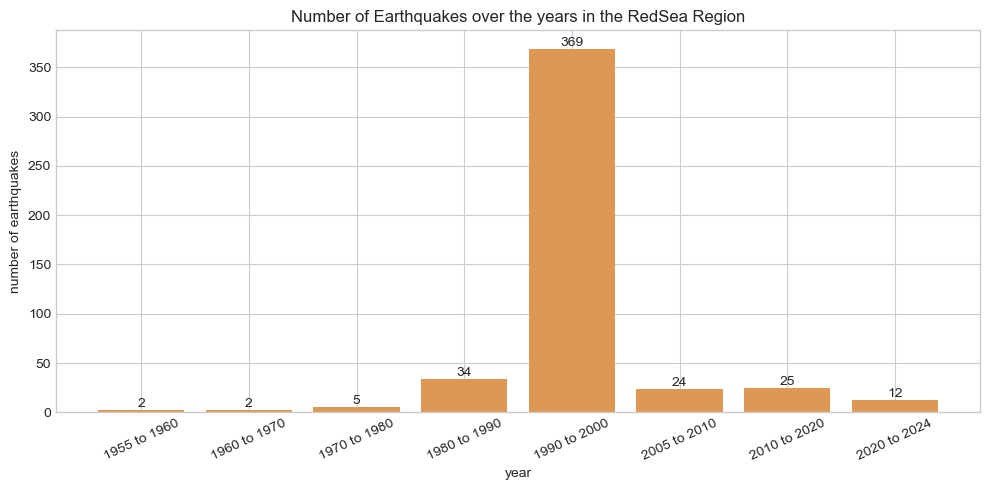

In [22]:
#Plot: Number of Earthquakes over the years in the RedSea Region

plt.figure(figsize = (10,5))

plt.bar_label(plt.bar(year_bracket, year_count, color = "#DE9853"))

plt.xticks(rotation = 25)

plt.title("Number of Earthquakes over the years in the RedSea Region")
plt.xlabel("year")
plt.ylabel("number of earthquakes")

plt.tight_layout()

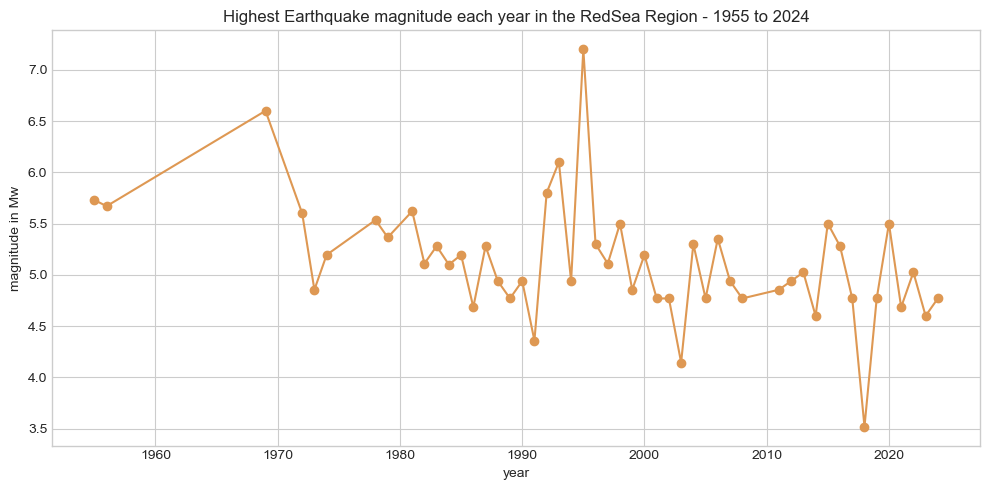

In [23]:
#Plot: Highest Earthquake magnitude each year in the RedSea Region - 1955 to 2024

plt.figure(figsize = (10,5))

plt.plot(year_highest_mag_1, highest_mag, color = "#DE9853", marker = 'o')

plt.title("Highest Earthquake magnitude each year in the RedSea Region - 1955 to 2024")
plt.xlabel("year")
plt.ylabel("magnitude in Mw")

plt.tight_layout()

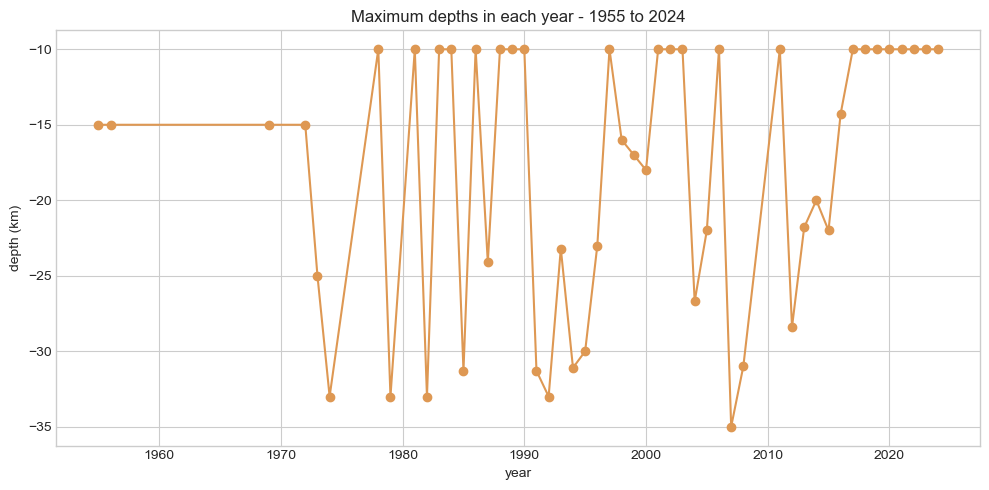

In [27]:
#Plot: Maximum depths in each year in the RedSea Region - 1955 to 2024

plt.figure(figsize = (10,5))

plt.plot(year_highest_mag_2, deepest, color = "#DE9853", marker = 'o')

plt.title("Maximum depths in each year - 1955 to 2024")
plt.xlabel("year")
plt.ylabel("depth (km)")

plt.tight_layout()

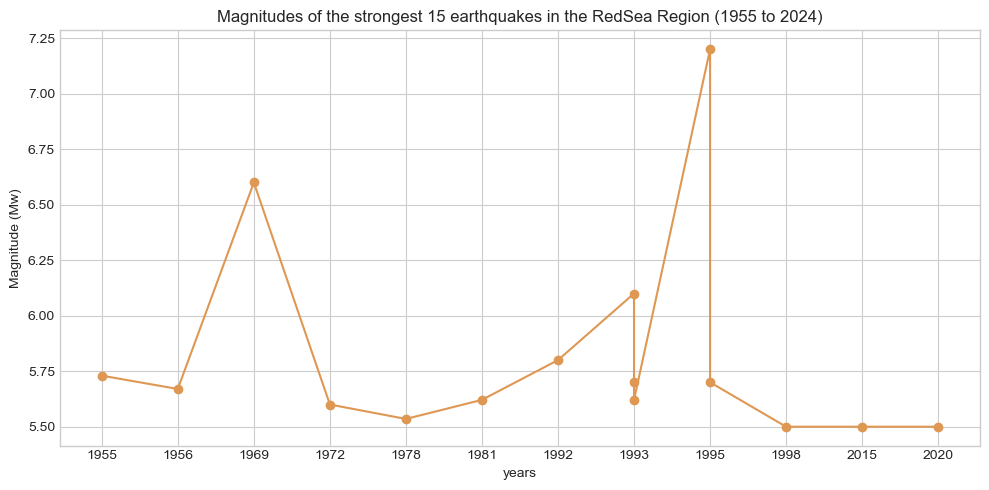

In [25]:
#Plot: Magnitudes of the strongest 15 earthquakes in the RedSea Region (1955 to 2024)

plt.figure(figsize = (10,5))

magnitude = top_15_earthquakes['mag_Mw']
top_10_years = top_15_earthquakes['year'].astype('str')

plt.plot(top_10_years, magnitude, marker = 'o', color = "#DE9853")

plt.title("Magnitudes of the strongest 15 earthquakes in the RedSea Region (1955 to 2024)")
plt.xlabel("years")
plt.ylabel("Magnitude (Mw)")


plt.tight_layout()

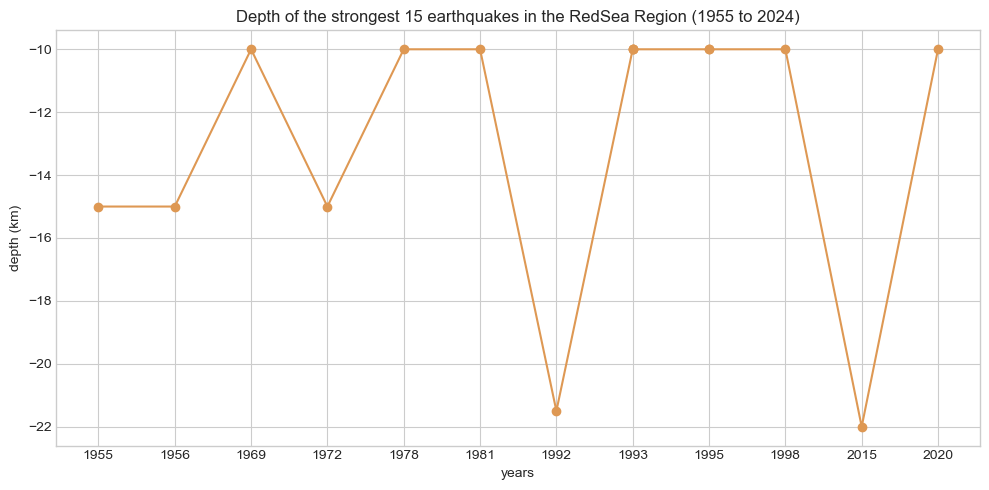

In [26]:
#Plot: Depth of the strongest 15 earthquakes in the RedSea Region (1955 to 2024)

plt.figure(figsize = (10,5))
plt.style.use( 'seaborn-v0_8-whitegrid')
depth = top_15_earthquakes['depth'] * -1
top_10_years = top_15_earthquakes['year'].astype('str')

plt.plot(top_10_years, depth, marker = 'o', color = "#DE9853")

plt.title("Depth of the strongest 15 earthquakes in the RedSea Region (1955 to 2024)")
plt.xlabel("years")
plt.ylabel("depth (km)")


plt.tight_layout()